This code imports the long dataset from UCI Machine Learning Repository to tidy it.

URL Source: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption



In [ ]:
# Based on https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import os

## Importing dataset

### Dataset Information

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).  
Notes:   
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.  
2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.  

### Variable Information
1.date: Date in format dd/mm/yyyy  
2.time: time in format hh:mm:ss  
3.global_active_power: household global minute-averaged active power (in kilowatt)  
4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)  
5.voltage: minute-averaged voltage (in volt)  
6.global_intensity: household global minute-averaged current intensity (in ampere)  
7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).  
8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.  
9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.  


Source: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption


In [ ]:
# If you can't access the internet or dwonalod the zip file, jump to the next code cell
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
!unzip household_power_consumption.zip

# import the txt file and create a datetime index using first two variables
df_ori=pd.read_csv(r'household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
df_ori.head()

--2023-12-08 14:09:44--  https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘household_power_consumption.zip.2’

household_power_con     [   <=>              ]  19.68M  41.8MB/s    in 0.5s    

2023-12-08 14:09:45 (41.8 MB/s) - ‘household_power_consumption.zip.2’ saved [20640916]

Archive:  household_power_consumption.zip
replace household_power_consumption.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
# #mount google drive
# from google.colab import drive
# drive.mount('/content/drive')

# #adjust your working directory
# os.chdir('/content/drive/My Drive/Data_Projects/MDS/3rd semester/Deep learning LAB/Assignments/LSTM-time-series-tutorial')


# # import the txt file and create a datetime index using first two variables
# df_ori=pd.read_csv(r'data/household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# df_ori.head()

In [ ]:
# Let's adjust columns names

df_ori.columns = ['total_real_power', 'reactive_power', 'voltage', 'current_intensity', 'kitchen', 'laundry_room', 'temp_control']


In [ ]:
# Replicate the original dataframe
df = df_ori.copy()
df.head()


,total_real_power,reactive_power,voltage,current_intensity,kitchen,laundry_room,temp_control
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
# Check NAs
df = df.replace('?', np.nan)
df.isnull().sum()

total_real_power     25979
reactive_power       25979
voltage              25979
current_intensity    25979
kitchen              25979
laundry_room         25979
temp_control         25979
dtype: int64

In [ ]:
# Let's fill NAs with values from previous day

# define a function
def fill_missing(values):
    one_day = 60*24 # since there is one observation per minute, one day is 60 * 24
    for row in range(df.shape[0]):
        for col in range(df.shape[1]):
            if np.isnan(values[row][col]): # If it's a NA
                values[row,col] = values[row-one_day,col] # copy the value from the day before

df = df.astype('float32') # convert values to float

fill_missing(df.values) # call the function for each value in the dataset
df.isnull().sum() # Check if there are NA values

total_real_power     0
reactive_power       0
voltage              0
current_intensity    0
kitchen              0
laundry_room         0
temp_control         0
dtype: int64

In [ ]:
# Since the variables 'kitchen', 'laundry_room', 'temp_control' are in watts-hour and we have the measure for each minute, we can convert it to kwatts

df[['kitchen', 'laundry_room', 'temp_control']] = df[['kitchen', 'laundry_room', 'temp_control']] * 60 / 1000




In [ ]:
# Aggregate dataset

# Define aggregation functions for each column
agg_functions = {
    'total_real_power': 'sum',
    'reactive_power': 'sum',
    'voltage': 'mean',
    'current_intensity': 'sum',
    'kitchen': 'sum',
    'laundry_room': 'sum',
    'temp_control': 'sum'
}

# Resample the DataFrame by hour/day and aggregate using the defined functions
df_hourly = df.resample('H').agg(agg_functions)
df_daily = df.resample('D').agg(agg_functions)


In [ ]:
#Let's check if our dataset misses any day

# Get the min and max day from 'datetime' variable
min_date = df_daily.index.min()
max_date = df_daily.index.max()

# Generate a sequence of all dates between the minimum and maximum dates
all_dates = pd.date_range(start=min_date, end=max_date, freq='D')

# Compare
missing_dates = all_dates[~all_dates.isin(df_daily.index)]

# Print
if (missing_dates.size > 0):
  print("Missing dates:", missing_dates)

In [ ]:
#Let's check if our dataset misses any hour

# Get the min and max date/time from 'datetime' variable
min_date = df_hourly.index.min()
max_date = df_hourly.index.max()

# Generate a sequence of all date/time between the minimum and maximum dates
all_dates = pd.date_range(start=min_date, end=max_date, freq='H')

# Compare
missing_dates = all_dates[~all_dates.isin(df_hourly.index)]

# Print
if (missing_dates.size > 0):
  print("Missing dates:", missing_dates)

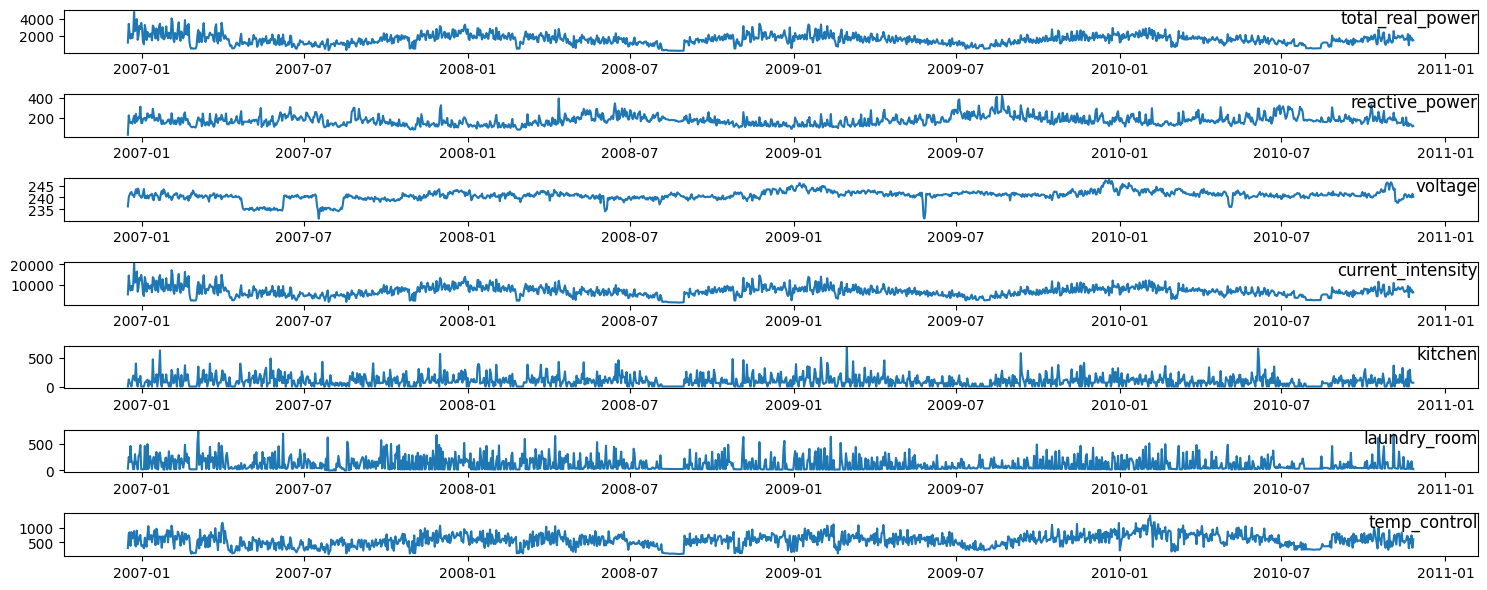

In [ ]:
# Let's plot our daily consumption

values_daily = df_daily.values


# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6]
i = 1
# plot each column
plt.figure(figsize=(15, 6))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(df_daily.index, values_daily[:, group])
    plt.title(df_daily.columns[group], y=0.5, loc='right')
    i += 1
plt.tight_layout()
plt.show()

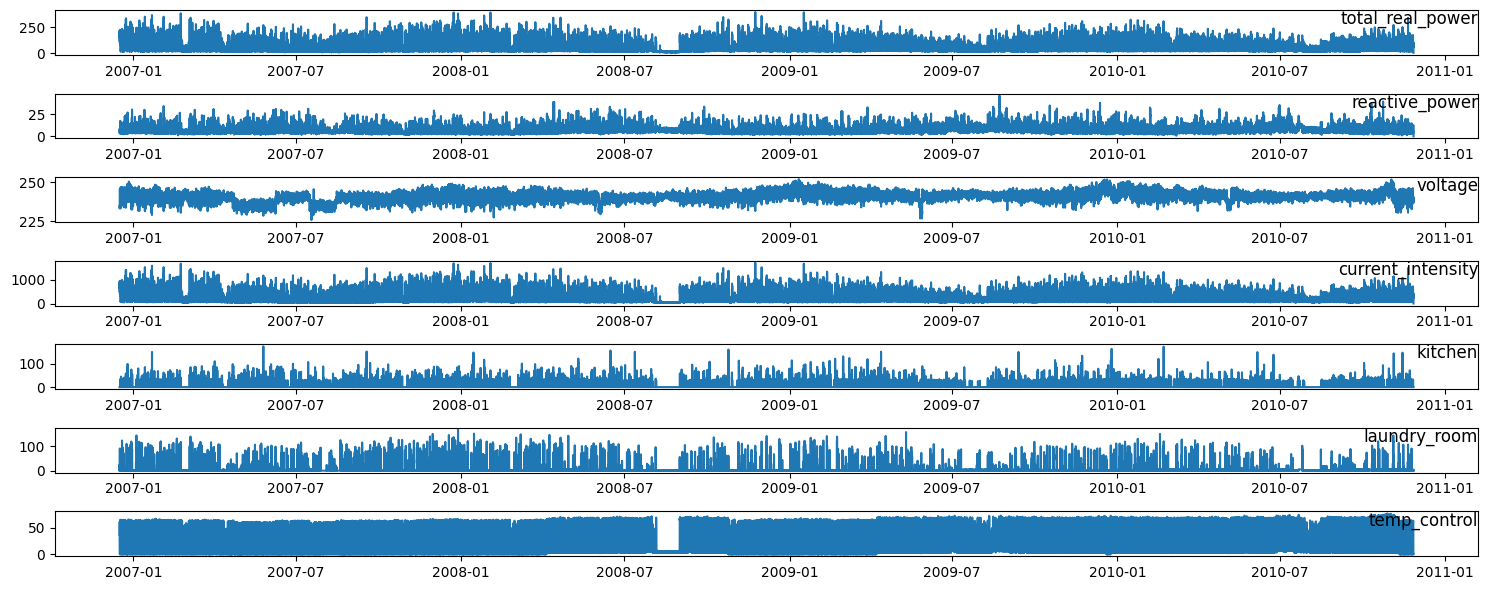

In [ ]:
# Let's plot our hourly consumption

values_hourly = df_hourly.values


# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6]
i = 1
# plot each column
plt.figure(figsize=(15, 6))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(df_hourly.index, values_hourly[:, group])
    plt.title(df_hourly.columns[group], y=0.5, loc='right')
    i += 1
plt.tight_layout()
plt.show()

In [ ]:


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg


# ensure all data is float
values = values_daily.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 30, 1)

# drop last columns
#reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.drop(reframed.columns[-values_daily.shape[1]+1:], axis=1, inplace=True)


print(reframed.head())

    var1(t-30)  var2(t-30)  var3(t-30)  var4(t-30)  var5(t-30)  var6(t-30)  \
30    0.211996    0.000000    0.315385    0.211006    0.000000    0.045090   
31    0.694252    0.499028    0.550493    0.695226    0.181875    0.345776   
32    0.431901    0.331329    0.620518    0.424618    0.095098    0.216451   
33    0.313037    0.302994    0.667476    0.311508    0.075058    0.627797   
34    0.436748    0.329256    0.686364    0.428075    0.000000    0.218680   

    var7(t-30)  var1(t-29)  var2(t-29)  var3(t-29)  ...  var6(t-2)  var7(t-2)  \
30    0.162013    0.694252    0.499028    0.550493  ...   0.245685   0.447695   
31    0.536762    0.431901    0.331329    0.620518  ...   0.348088   0.520463   
32    0.566912    0.313037    0.302994    0.667476  ...   0.184904   0.617903   
33    0.218615    0.436748    0.329256    0.686364  ...   0.053184   0.235805   
34    0.568916    0.325660    0.285998    0.608740  ...   0.473780   0.658027   

    var1(t-1)  var2(t-1)  var3(t-1)  var4(t-

In [ ]:


# Reset the index
df_hourly.reset_index(inplace=True)
df_daily.reset_index(inplace=True)

# Export results
df_daily.to_csv('data/df_daily.csv', index=False)
df_hourly.to_csv('data/df_hourly.csv', index=False)
reframed.to_csv('data/reframed.csv', index=False)

